In [1]:
%load_ext autoreload
%autoreload 2
    
from leaguesync import * 
from leaguesync.pike13 import logger
import logging

logging.basicConfig()
logger.setLevel(logging.DEBUG)

import warnings

p13 = Pike13('./league-remote.env')

pdf = Pike13DataFrames(p13)

/Users/eric/proj/league-projects/leaguesync/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from datetime import datetime 
datetime.fromisoformat('2015-01-01T00:00:00Z')

<Axes: xlabel='visit_month'>

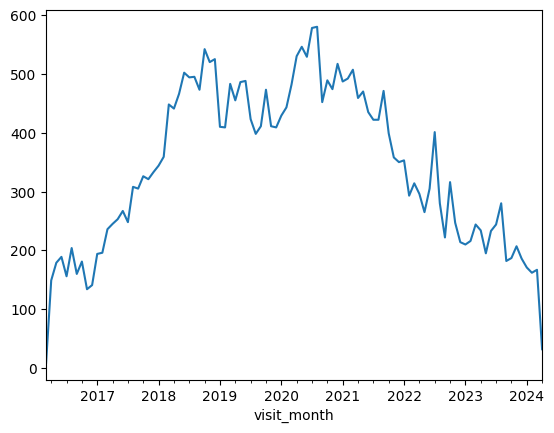

In [2]:

visits = pdf.visits
visits.groupby(visits.visit_month).event_occurrence_id.nunique().plot()


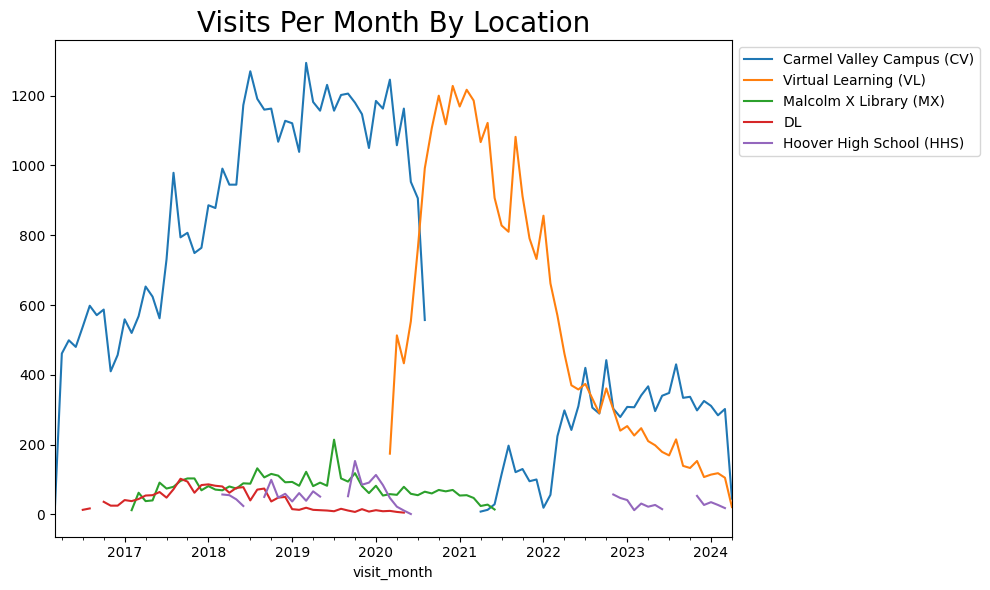

In [3]:
t = pdf.visits\
    .merge(pdf.event_occurrences[['event_occurrence_id','event_id','location_id']], on ='event_occurrence_id', how='left')\
    .merge(pdf.locations, on='location_id',how='left')\
    .merge(pdf.events[['event_id','event_name','service_id','service_type']], on ='event_id', how='left')

def get_name(v):
    names = ['SMH','WMS','SEM','DL','SMD','VL','LH','SM','Gompers']
    import re
    for e in  re.split('@|\s', v):
        if e in names:
            return e
    return None

t.loc[t.location_name.isnull(),'location_name'] = t[t.location_name.isnull()]['event_name'].apply(get_name)

import matplotlib.pyplot as plt

z = t.groupby(['visit_month', 'location_name']).visit_id.count().to_frame('n').unstack(-1)

z.columns = z.columns.droplevel(0)

top_loc = list(t.location_name.value_counts()[:5].index)


ax = z[top_loc].plot(figsize=(10,6))

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_title('Visits Per Month By Location', fontsize=20)

# Adjust layout to make room for the legend
plt.tight_layout()


In [4]:
pdf.services

,service_id,service_name,type,duration_in_minutes,maximum_clients,category_id,category_name,description,description_short,instructions
0,263387,Java Classes,GroupClass,90,6,93504.0,Group Classes,"<div class=""wysiwyg-text-align-left""><span sty...",Weekly Java classes taught in person at our Ca...,<p><strong><b>THANK YOU - We appreciate all ad...
1,191042,Java Online,GroupClass,90,5,93504.0,Group Classes,"<div class=""wysiwyg-text-align-left""><span sty...","Weekly Java classes, taught online.",None
2,270616,Python Classes,GroupClass,90,5,93504.0,Group Classes,"<div class=""wysiwyg-text-align-left"">Our weekl...","Weekly Python classes, taught in person at our...",None
3,255811,Python Online,GroupClass,90,5,93504.0,Group Classes,"<span style=""background-color: rgba(255, 255, ...","Weekly Python classes, taught online.","<div class=""p-rich_text_section"" style=""text-a..."
4,322066,Java Workshop,Course,60,7,93594.0,Workshops,<p><br></p><p>The Java Workshop teaches new pr...,None,<p></p><p>Welcome...before your first day of c...
5,322065,Python Workshop,Course,60,7,93594.0,Workshops,<p><br></p><p>The Python Workshop is meant for...,None,<p></p><p>Welcome...before your first day of c...
6,320425,Intro to Python,Course,60,8,93521.0,Camps,"<p><img alt="""" src=""https://d1nqv8xdwxria6.clo...",None,"<p>Welcome...before your first day of class, w..."
7,320134,Intro to Java,Course,60,10,93521.0,Camps,"<b><img alt="""" src=""https://d1nqv8xdwxria6.clo...",None,<b><p>Welcome...before your first day of class...
8,304450,AI Camp,Course,60,8,93521.0,Camps,"<p><img alt="""" src=""https://d1nqv8xdwxria6.clo...",None,"Location: 12625 High Bluff Dr #113, San Diego,..."
9,233439,SLAMS - 5 Day,Course,60,10,78358.0,Slams,<p><br></p><p>SLAMS (Short Learning Accelerate...,,


In [5]:
from datetime import datetime
import pandas as pd
import pytz 

one_month_ago = datetime.now(pytz.utc) - pd.DateOffset(weeks=2)

t = pdf.event_occurrences
t = t[t['start_at'] > one_month_ago]
t = t.merge(pdf.services[['service_id','service_name','category_name']])
t = t[['event_occurrence_id', 'event_id', 'service_id','location_id',  'event_name', 'service_name',  'start_at']]
t

,event_occurrence_id,event_id,service_id,location_id,event_name,service_name,start_at
0,200425232,9634439,191042,23281,Java@VL Wolf,Java Online,2024-03-27 00:00:00+00:00
1,200505451,10395984,288419,22675,Make-Up Lab @CV Java/Python (small),Make-Up Lab @CV Java/Python (small),2024-03-27 22:30:00+00:00
2,200531452,7223139,191042,22675,Java@CV Gorilla,Java Online,2024-03-27 22:30:00+00:00
3,200503539,4950761,191042,22675,Java@CV Giraffe,Java Online,2024-03-28 00:00:00+00:00
4,200508331,9611015,255811,23281,Python@VL Stingray,Python Online,2024-03-28 00:00:00+00:00
...,...,...,...,...,...,...,...
1053,227250652,13556279,304450,22675,AI Camp,AI Camp,2024-07-29 20:00:00+00:00
1054,210410420,9804197,191042,23281,Java@VL Starling,Java Online,2024-07-29 22:30:00+00:00
1055,210421797,8792522,263387,22675,Java@CV Cobra,Java Classes,2024-07-29 22:30:00+00:00
1056,210416387,7469782,191042,23281,Java@VL Sea Bass,Java Online,2024-07-30 00:00:00+00:00


In [6]:
event_staff_rows = []
for eo in p13.event_occs:
    for staff in eo.get('staff_members',[]):
        event_staff_rows.append({
            'event_occurrence_id': eo['id'],
            'event_id' : eo['event_id'],
            'location_id': eo['location_id'],
            'event_name': eo['name'],
            'staff_id': staff['id'],
            'staff_name': staff['name']
        })

        

In [7]:
pd.DataFrame(event_staff_rows)

,event_occurrence_id,event_id,location_id,event_name,staff_id,staff_name
0,32053044,1411943,22675,[Level 1] @ CV Tiger,2274828,League Admin
1,32055163,1412158,22675,[Level 0] @ CV Penguin,2274828,League Admin
2,32052355,1406853,22675,[Level 2] @ CV Elephant,2274828,League Admin
3,32038901,1407021,22675,[Level 7] @ CV Caterpillar,2274828,League Admin
4,32433659,1433807,22675,[Level 8] @ CV Caterpillar,2274828,League Admin
...,...,...,...,...,...,...
67244,227250652,13556279,22675,AI Camp,2503800,Keith Groves
67245,210410420,9804197,23281,Java@VL Starling,7861875,VA-Tammy Neuhaus
67246,210421797,8792522,22675,Java@CV Cobra,11323921,Jed Stumpf
67247,210416387,7469782,23281,Java@VL Sea Bass,2503800,Keith Groves


In [8]:
pdf = Pike13DataFrames(p13)
pdf.locations

,location_id,location_name,latitude,longitude,location_code
0,22675,Carmel Valley Campus (CV),32.9474,-117.239,CV
1,23281,Virtual Learning (VL),NaN,NaN,VL
2,30565,Hoover High School (HHS),32.7555,-117.098,HHS
3,27543,Malcolm X Library (MX),32.7108,-117.084,MX
4,37549,Innovation Middle School (IMS),32.8373,-117.174,IMS
5,38591,Millennial Tech Middle School (MT),32.7175,-117.089,MT
6,38688,NCRC Center,NaN,NaN,NaN
7,39104,GOLDEN HILL K-8,32.7188,-117.124,NaN
8,39105,MONTGOMERY MIDDLE,32.7885,-117.172,NaN
9,39106,TAFT MIDDLE,32.8017,-117.131,NaN
